In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math

In [2]:
def gravitational_potential(m, xm, ym, x, y):
    if xm == x and ym == y: return np.nan;
    return -6.67*10**-11 * m / ((xm - x)**2 + (ym - y)**2)**0.5
gravitational_potential = np.vectorize(gravitational_potential)

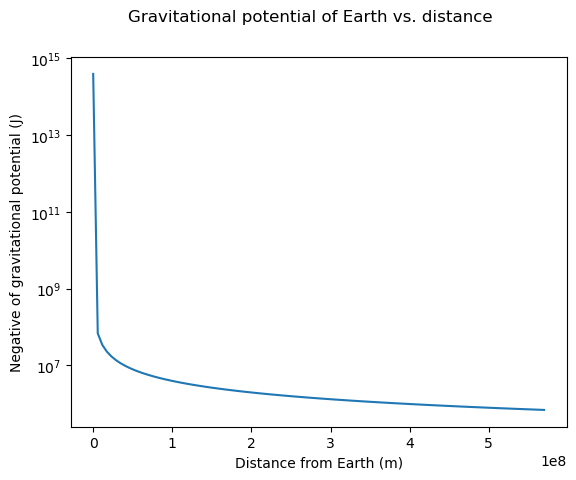

In [3]:
axis, plot = plt.subplots()
dem = 3.8*10**8
x = np.linspace(1, 1.5 * dem, 100)
y = gravitational_potential(5.9*10**24, 0, 0, x, 0)
plot.plot(x, -y)
plot.set_yscale("log")
plot.set_xlabel("Distance from Earth (m)")
plot.set_ylabel("Negative of gravitational potential (J)")
axis.suptitle("Gravitational potential of Earth vs. distance");

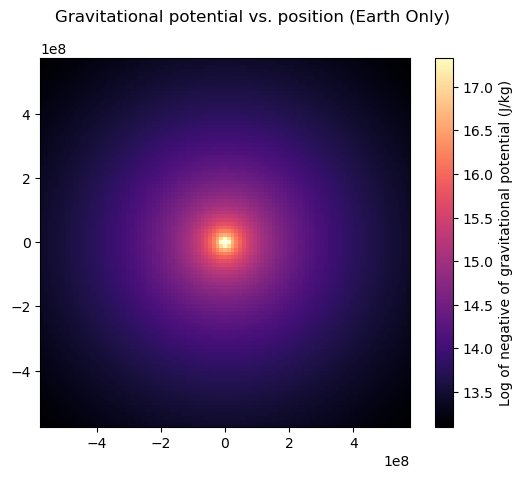

In [4]:
axis, plot = plt.subplots()
r = np.linspace(-1.5 * dem, 1.5 * dem, 99)
xm, ym = np.meshgrid(r, r)
axis.colorbar(plot.pcolormesh(xm, ym, np.log(-gravitational_potential(5.9 * 10 ** 24, 0, 0, xm, ym)), cmap="magma")).set_label("Log of negative of gravitational potential (J/kg)")
axis.suptitle("Gravitational potential vs. position (Earth Only)")
plot.set_aspect("equal")

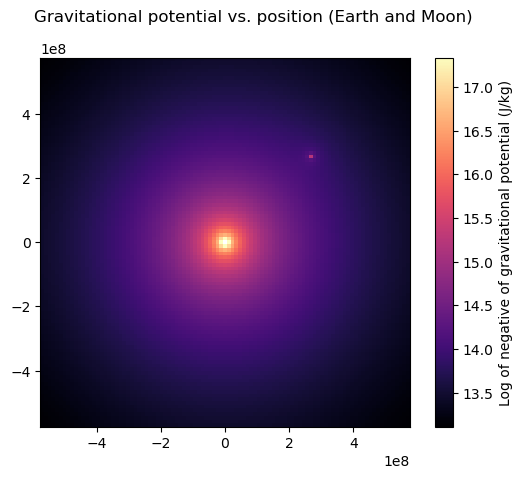

In [5]:
axis, plot = plt.subplots()
axis.colorbar(plot.pcolormesh(xm, ym, np.log(-gravitational_potential(5.9 * 10 ** 24, 0, 0, xm, ym) - gravitational_potential(7.3 * 10**22, dem/np.sqrt(2), dem/np.sqrt(2), xm, ym) ), cmap="magma")).set_label("Log of negative of gravitational potential (J/kg)")
axis.suptitle("Gravitational potential vs. position (Earth and Moon)")
plot.set_aspect("equal")

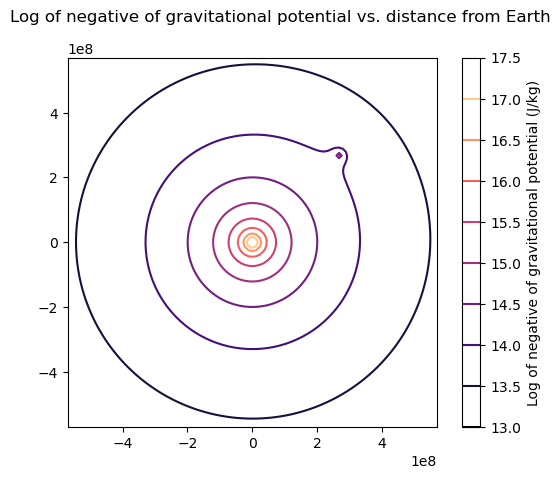

In [6]:
axis, plot = plt.subplots()
axis.colorbar(plot.contour(xm, ym, np.log(-gravitational_potential(5.9 * 10 ** 24, 0, 0, xm, ym) - gravitational_potential(7.3 * 10**22, dem/np.sqrt(2), dem/np.sqrt(2), xm, ym) ), cmap="magma", levels=9)).set_label("Log of negative of gravitational potential (J/kg)")
axis.suptitle("Log of negative of gravitational potential vs. distance from Earth")
plot.set_aspect("equal")

In [7]:
def gravitational_force(m1, x1, y1, m2, x2, y2):
    hyp_squared = (x1 - x2)**2 + (y1 - y2)**2
    return -gravitational_potential(m1, x1, y1, x2, y2) * m2 * (x1-x2) / hyp_squared, -gravitational_potential(m1, x1, y1, x2, y2) * m2 * (y1-y2) / hyp_squared

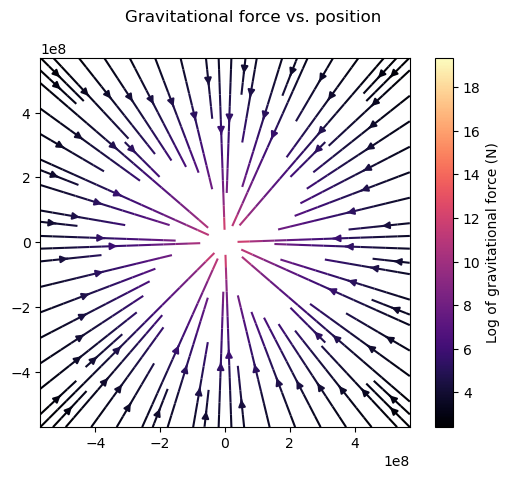

In [12]:
axis, plot = plt.subplots()
force = gravitational_force(5.9e24, 0, 0, 5500, xm, ym) + gravitational_force(7.3e2, dem/np.sqrt(2), dem/np.sqrt(2), 5500, xm, ym)
axis.colorbar(plot.streamplot(xm, ym, force[0], force[1], color=np.log(force[0] ** 2 + force[1] ** 2), cmap="magma").lines).set_label("Log of gravitational force (N)")
axis.suptitle("Gravitational force vs. position")
plot.set_aspect("equal")

In [9]:
T = (2.8e6 - 7.5e5)/1.3e4
print(T)

157.69230769230768


In [10]:
def m(m0, md, t):
    return m0  - md * t
def dv(t, ve, m0, mf, md, g):
    if t >= T: return 0
    else: return ve * np.log(m0/m(m0, md, t)) - g * t
dv = np.vectorize(dv)

In [11]:
scipy.integrate.quad(dv, 0, T, args=(2.4e3, 2.8e6, 7.5e5, 1.3e4, 9.81))[0]

74093.98013366401